In [10]:
doc_token = "Enron<tokesep>Security<tokesep>Letters"

In [11]:
[" ".join(sent.split("<tokesep>")).split() for sent in doc_token.split("<sentsep>")]

[['Enron', 'Security', 'Letters']]

In [21]:
doc = "Attached<tokesep>for<tokesep>your<tokesep>review<tokesep>and<tokesep>comments<tokesep>is<tokesep>a<tokesep>revised<tokesep>Confirmation<tokesep>for<tokesep>the<tokesep>EES<tokesep>Weather<tokesep><tokesep>snowfall<tokesep>cap<tokesep>option<tokesep><tokesep>product<tokesep><sentsep><tokesep>I<tokesep>have<tokesep>also<tokesep>attached<tokesep>a<tokesep>blackline<tokesep>against<tokesep>the<tokesep>last<tokesep>draft<tokesep>distributed<tokesep><tokesep>as<tokesep>well<tokesep>as<tokesep>a<tokesep>copy<tokesep>of<tokesep>the<tokesep>last<tokesep>Terms<tokesep>and<tokesep>Conditions<tokesep>distributed<tokesep><tokesep>unchanged<tokesep>from<tokesep>prior<tokesep>draft<tokesep><tokesep>and<tokesep>the<tokesep>Credit<tokesep>Support<tokesep>Annex<tokesep><tokesep>also<tokesep>unchanged<tokesep>from<tokesep>prior<tokesep>draft<tokesep><tokesep><sentsep><tokesep>Unless<tokesep>informed<tokesep>otherwise<tokesep><tokesep>this<tokesep>product<tokesep>is<tokesep>scheduled<tokesep>for<tokesep>release<tokesep>no<tokesep>later<tokesep>than<tokesep>tomorrow<tokesep>so<tokesep>kindly<tokesep>send<tokesep>any<tokesep>comments<tokesep>to<tokesep>my<tokesep>attention<tokesep>ASAP<tokesep><tokesep>or<tokesep>let<tokesep>me<tokesep>know<tokesep>if<tokesep>you<tokesep>require<tokesep>additional<tokesep>review<tokesep>time<tokesep><sentsep><tokesep>Please<tokesep>note<tokesep>also<tokesep>that<tokesep>the<tokesep>foregoing<tokesep>is<tokesep>not<tokesep>intended<tokesep>to<tokesep>imply<tokesep>that<tokesep>other<tokesep>procedures<tokesep>and<tokesep>approvals<tokesep><tokesep>eg<tokesep>RAC<tokesep>Approval<tokesep><tokesep><tokesep>if<tokesep>any<tokesep><tokesep>required<tokesep>for<tokesep>the<tokesep>introduction<tokesep>of<tokesep>new<tokesep>products<tokesep>by<tokesep>EES<tokesep><tokesep><tokesep>EWS<tokesep><tokesep>policies<tokesep>have<tokesep>been<tokesep>completed<tokesep><sentsep><tokesep>Thanks<tokesep>"
sub = "Revised<tokesep>Weather<tokesep>Products"

In [22]:
greedy_selection(doc, sub, 3)

0.09523809278911571 {'comments', 'the', 'and', '', 'Attached', 'a', 'for', 'EES', 'Confirmation', 'product', 'Weather', 'review', 'revised', 'option', 'your', 'cap', 'is', 'snowfall'} {'Products', 'Weather', 'Revised'}
0.0 {'', 'and', 'Annex', 'Conditions', 'Support', 'copy', 'the', 'attached', 'against', 'distributed', 'as', 'also', 'blackline', 'have', 'unchanged', 'of', 'Credit', 'prior', 'I', 'well', 'last', 'Terms', 'draft', 'from', 'a'} {'Products', 'Weather', 'Revised'}
0.0 {'', 'time', 'product', 'send', 'later', 'to', 'tomorrow', 'attention', 'ASAP', 'me', 'for', 'no', 'Unless', 'is', 'comments', 'any', 'you', 'scheduled', 'informed', 'review', 'let', 'know', 'if', 'additional', 'or', 'otherwise', 'kindly', 'this', 'release', 'than', 'my', 'require', 'so'} {'Products', 'Weather', 'Revised'}
0.0 {'', 'and', 'Approval', 'introduction', 'by', 'policies', 'RAC', 'products', 'the', 'to', 'intended', 'imply', 'for', 'note', 'procedures', 'is', 'that', 'eg', 'any', 'not', 'also', 'co

[1, 2, 0]

In [20]:
def cal_rouge(evaluated_ngrams, reference_ngrams):
    reference_count = len(reference_ngrams)
    evaluated_count = len(evaluated_ngrams)

    overlapping_ngrams = evaluated_ngrams.intersection(reference_ngrams)
    overlapping_count = len(overlapping_ngrams)

    if evaluated_count == 0:
        precision = 0.0
    else:
        precision = overlapping_count / evaluated_count

    if reference_count == 0:
        recall = 0.0
    else:
        recall = overlapping_count / reference_count

    f1_score = 2.0 * ((precision * recall) / (precision + recall + 1e-8))
    return {"f": f1_score, "p": precision, "r": recall}

def one_gram(sent, sep=" "):
    return set(sent.split(sep)) 
def two_gram(sent, sep=" "):
    last = ""
    grams = []
    first = True
    for word in sent.split(sep):
        if first:
            first = False
        else:
            grams.append("{} {}".format(last, word))
        last = word
    return set(grams)
def greedy_selection(doc, sub, summary_size):
    
    selected = []
    sub_gram1 = one_gram(sub.replace("<sentsep>","<tokesep>"), sep="<tokesep>")
    sub_gram2 = two_gram(sub.replace("<sentsep>","<tokesep>"), sep="<tokesep>")
    
    for index, sent in enumerate(doc.split("<sentsep>")):
        sent_gram1 = one_gram(sent, sep="<tokesep>")
        sent_gram2 = two_gram(sent, sep="<tokesep>")
        rouge_1 = cal_rouge(sub_gram1, sent_gram1)['f']
        rouge_2 = cal_rouge(sub_gram2, sent_gram2)['f']
        rouge = rouge_1 + rouge_2
        print(rouge, sent_gram1, sub_gram1)
        if len(selected) < 3:
            selected.append((rouge, index))
            selected.sort()
            continue
        if rouge > selected[0][0]:
            selected[0] = (index, rouge)
            selected.sort()
    selected.sort()
    return [index for _,index in selected]

In [1]:
def cal_rouge(evaluated_ngrams, reference_ngrams):
    reference_count = len(reference_ngrams)
    evaluated_count = len(evaluated_ngrams)

    overlapping_ngrams = evaluated_ngrams.intersection(reference_ngrams)
    overlapping_count = len(overlapping_ngrams)

    if evaluated_count == 0:
        precision = 0.0
    else:
        precision = overlapping_count / evaluated_count

    if reference_count == 0:
        recall = 0.0
    else:
        recall = overlapping_count / reference_count

    f1_score = 2.0 * ((precision * recall) / (precision + recall + 1e-8))
    return {"f": f1_score, "p": precision, "r": recall}

In [2]:
def one_gram(sent, sep=" "):
    return set(sent.split(sep)) 
def two_gram(sent, sep=" "):
    last = ""
    grams = []
    first = True
    for word in sent.split(sep):
        if first:
            first = False
        else:
            grams.append("{} {}".format(last, word))
        last = word
    return set(grams)

In [3]:
path = "exp_result/ext_bert_aeslc_step18000"
sub_path = path+".gold"
doc_path = path+".candidate"    
reader_sub = open(sub_path)
reader_doc = open(doc_path)

rouge_max = {"1_gram":[], "2_gram":[]}
while True:
    doc_token = reader_doc.readline().replace("\n","")
    sub_token = reader_sub.readline().replace("\n","")
    if not doc_token:
        reader_doc.close()
        reader_sub.close()
        break
    
    target = sub_token
    gram_max_f_1 = 0
    gram_max_cache_1 = {'f':0, 'p':0, 'r':0}
    gram_max_f_2 = 0
    gram_max_cache_2 = {'f':0, 'p':0, 'r':0}
    for index, sent in enumerate(doc_token.split("<p>")):
        gram_1 = cal_rouge(one_gram(sent), one_gram(target))
        if gram_1['f'] > gram_max_f_1:
            gram_max_cache_1 = gram_1
            gram_max_f_1 = gram_1['f']
        gram_2 = cal_rouge(two_gram(sent), two_gram(target))
        if gram_2['f'] > gram_max_f_2:
            gram_max_cache_2 = gram_2 
            gram_max_f_2 = gram_2['f']
    rouge_max["1_gram"].append([gram_max_cache_1['f'],
                               gram_max_cache_1['p'],
                               gram_max_cache_1['r']])
    rouge_max["2_gram"].append([gram_max_cache_2['f'],
                               gram_max_cache_2['p'],
                               gram_max_cache_2['r']])
#     rouge_max["1_gram"].append(gram_max_f_1)
#     rouge_max["2_gram"].append(gram_max_f_2)

reader_doc.close()
reader_sub.close()

In [4]:
import numpy as np

In [5]:
res = np.array(rouge_max['1_gram'])
np.sum(res, axis = 0)/res.shape[0]

array([0.09733577, 0.0566833 , 0.49793651])

In [6]:
gram_1 = np.array(rouge_max['1_gram'])
gram_2 = np.array(rouge_max['2_gram'])

In [8]:
import matplotlib.pyplot as plt
def plot_hist(data, bins, title, xlabel, ylabel):
    plt.hist(data, bins=bins, histtype="bar", rwidth=0.9, alpha=0.6)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
def plot_box(data, title="", xlabel="", ylabel=""):
    print("Range:", "({}, {})".format(min(data), max(data)))
    print("  Avg:", sum(data)/len(data))
    plt.boxplot(data, vert=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
def plot_stat(data, bins=None, describe=""):
    plot_box(data, "Box: "+describe, "count", describe)
    plot_hist(data, bins, "Hist: "+describe, describe, "dount")

Range: (0.0, 0.5263157853601108)
  Avg: 0.09733576826531493


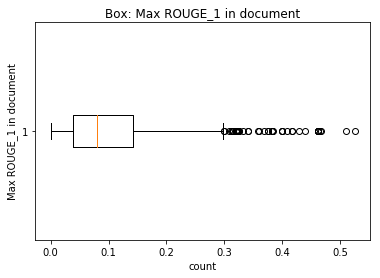

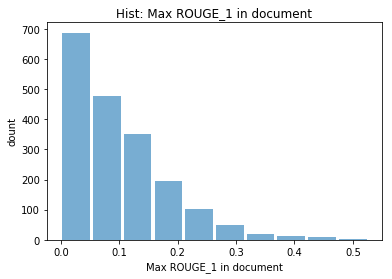

In [9]:
plot_stat(gram_1, None, "Max ROUGE_1 in document")

Range: (0.0, 0.4615384577251808)
  Avg: 0.03069475060956934


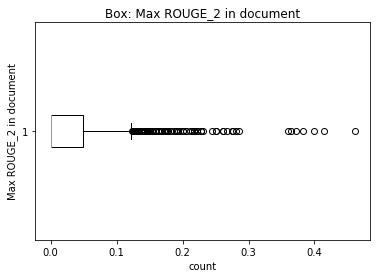

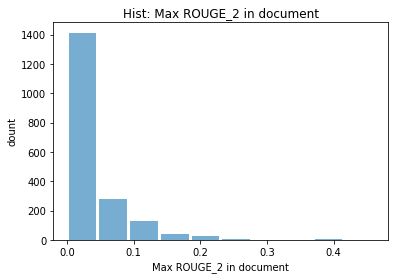

In [10]:
plot_stat(gram_2, None, "Max ROUGE_2 in document")

In [7]:
sum(gram_1>0.25)/len(gram_1)

0.05613850996852046